# Problem description

Let's suppose you have to test 2 variants of a web page. You want to evaluate whether there is a difference between the two variants in terms of average time (in seconds) the users spend on the webpage before leaving.
<br>The first one is yellow and the second one is blue. Everything else in the pages is the same. 

<img src="assets/AB_1.gif" width="600" height="600">

You design an A/B test, randomly assign the users to each treatment group and get the following results.

In [1]:
# As we don't have real data, let's randomly draw 200 from normal distribution.

import numpy as np

np.random.seed(50) # fixing the random seed

data_for_A = np.random.normal(50, 15, 150)
data_for_B = np.random.normal(55, 18, 150)

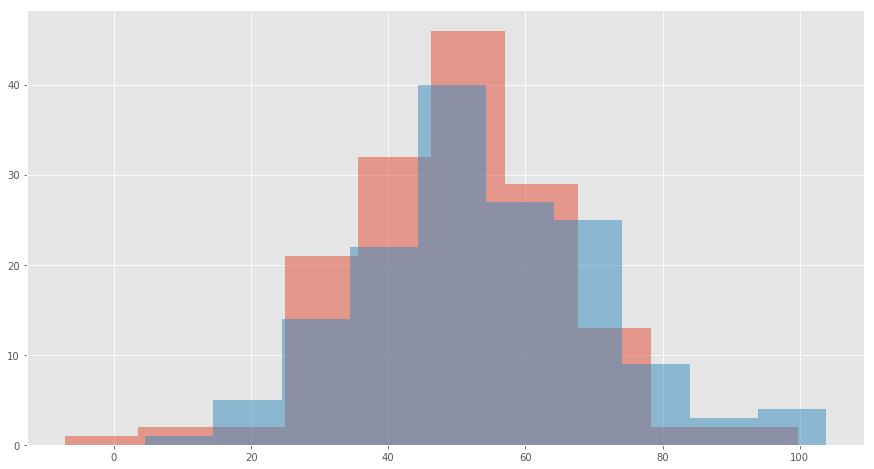

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.hist(data_for_A, alpha = 0.5)
plt.hist(data_for_B, alpha = 0.5);

In [3]:
np.mean(data_for_A), np.std(data_for_A), np.mean(data_for_B), np.std(data_for_B)

(49.608801173968466, 15.780012437448667, 53.54222630248696, 17.64330862333175)

So we get the following results:

* The page A was seen by 200 users with the following details: average time spent is 49.6, standard deviation: 15.78.
* The page B was seen by 200 users with the following details: average time spent is 53.54, standard deviation: 17.64.

## Everything is ready to evaluate the results and see whether we have a winner or not.

<br> Note that we are tempted to conclude that B is a winner as it has a higher average time spent on it (53.54sec vs 49.6sec). 

# Importing the dependencies

In [4]:
from AB import ABMean #custom class for evaluating the experiment results

import warnings
warnings.filterwarnings('ignore')

### 1. Setting the control and treatment groups' data

In [5]:
data_c = data_for_A
data_t = data_for_B

### 2. Running the experiment

In [6]:
exp = ABMean(data_c, data_t) # custom values of alpha and power can be provided, defaults are 0.05 and 0.8

### 3. Setting the baseline values and minimum detectable effects for minimum sample size calculations.

Let's suppose, for us the baseline mean is 50 / mean of variant A.
<br> And we are trying to detect whether variant B is at least 10% better than A.

In [7]:
mean_c = np.mean(data_c)
mean_t = np.mean(data_t)
stdev_c = np.std(data_c)
stdev_t = np.std(data_t)

baseline_value = 50 # use <<baseline_value =mean_c>> to see how many users you need in each treatment group
                      # to get a statistically significant difference and also desired level of statistical power

min_det_effect = 0.1 # min_det_effect = mean_t/mean_c-1


baseline_var = 15**2 # baseline_var = stdev_c**2
treatment_var = 18**2 # treatment_var = stdev_t**2

exp.baseline_value = baseline_value
exp.min_det_effect = min_det_effect
exp.baseline_var = baseline_var
exp.treatment_var = treatment_var

### 4. Displaying key stats of the experiment before running it (most importantly minimum sample size).

In [8]:
exp.pre_experiment_stats()

Alpha:				0.05
Power:				0.80
Baseline value:			50.0000000
Minimum detectable effect:	5.0000000
Treatment value:		55.0000000
Minimum sample size:		172


As we see, we needed only 172 users in each group to get at least 80% statistical power.

In [9]:
exp.return_sample_stats()

============ Control ============
Sample size:		150
Value:			49.6088012
Standard deviation:	15.7800124
=========== Treatment ===========
Sample size:		150
Value:			53.5422263
Standard deviation:	17.6433086


### 5. Evaluating the experiment: Is the difference between groups statistically significant?

In [10]:
exp.hypothesis_summary()

p = 0.0418. We reject the Null hypothesis. The difference is statistically significant on significance level: 95%.
test statistic:				2.0352
Degrees of freedom:			298
p-value (Probability of Type I error):	0.0418
Alpha:					0.05
Beta (Probability of Type II error):	0.4700
Power:					0.5300


As we see, we barely get a statistically significant result, so we should be very very cautious with our conclusions. And 53% power is not satisfactory for us, so my advice is to wait and collect more data.
<br> The result is more shaky, if you are making more than one comparisons. You should make appropriate adjustments (e.g. bonferroni corrections) and set more strict thresholds for alpha and beta. 

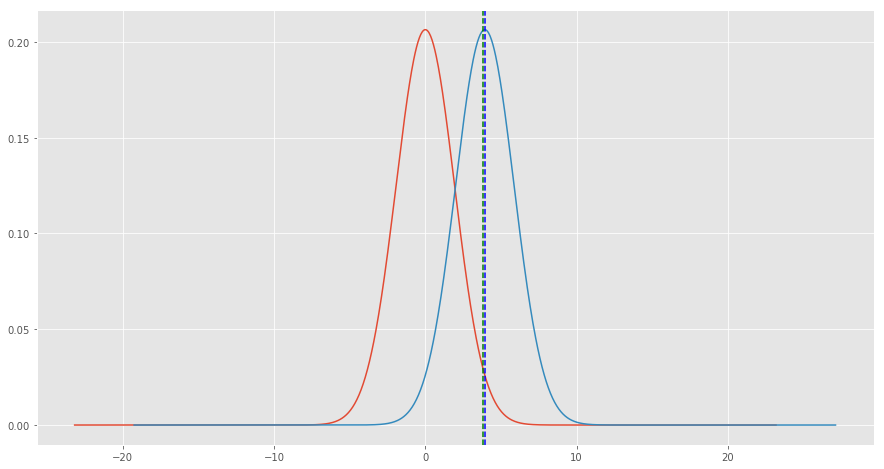

In [11]:
exp.plot_hypothesis_distributions(green_line = True, blue_line=True) # green line - 95% percentile of the Null hypothesis,
                                                                     # blue line - the difference between groups

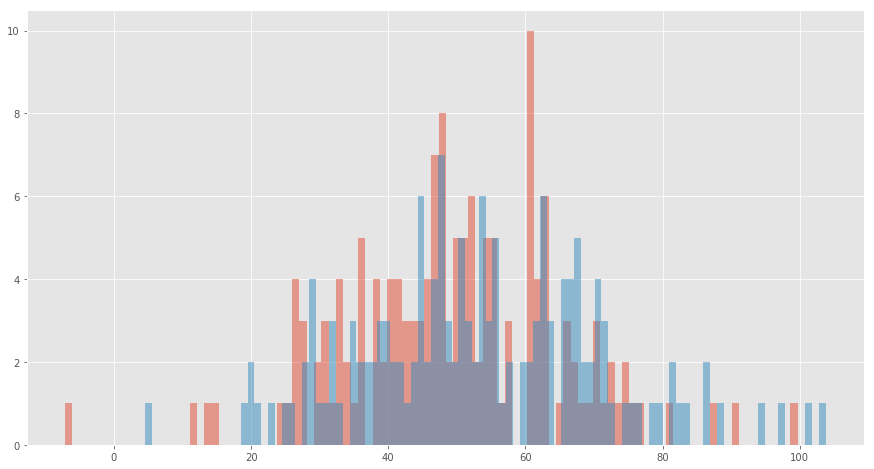

In [12]:
exp.plot_groups_distributions()